In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0           #합성곱에서 입력데이터에 채널(깊이) 가 있어야함
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu', padding='same', input_shape=(28,28,1)))           #합성곱 층   32개의 필터 (3X3)
model.add(keras.layers.MaxPooling2D(2))         #풀링층

model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu', padding='same'))          
model.add(keras.layers.MaxPooling2D(2))  

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
keras.utils.plot_model(model)

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
'''
history = model.fit(train_scaled, train_target, epochs = 20, validation_data=(val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

preds = model.predict(val_scaled[0:1])
print(preds)
'''


(3, 3, 1, 32) (32,)
-0.03206992 0.24768643
(3, 3, 1, 32)


1/1 [==============================] - 0s 45ms/step


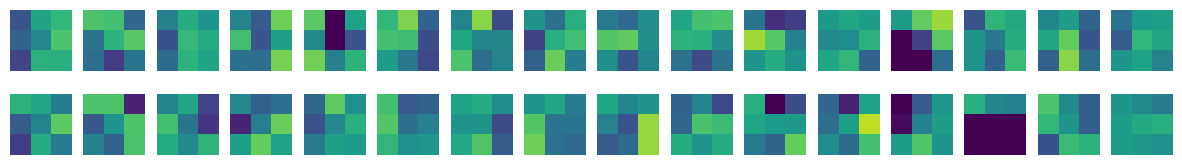

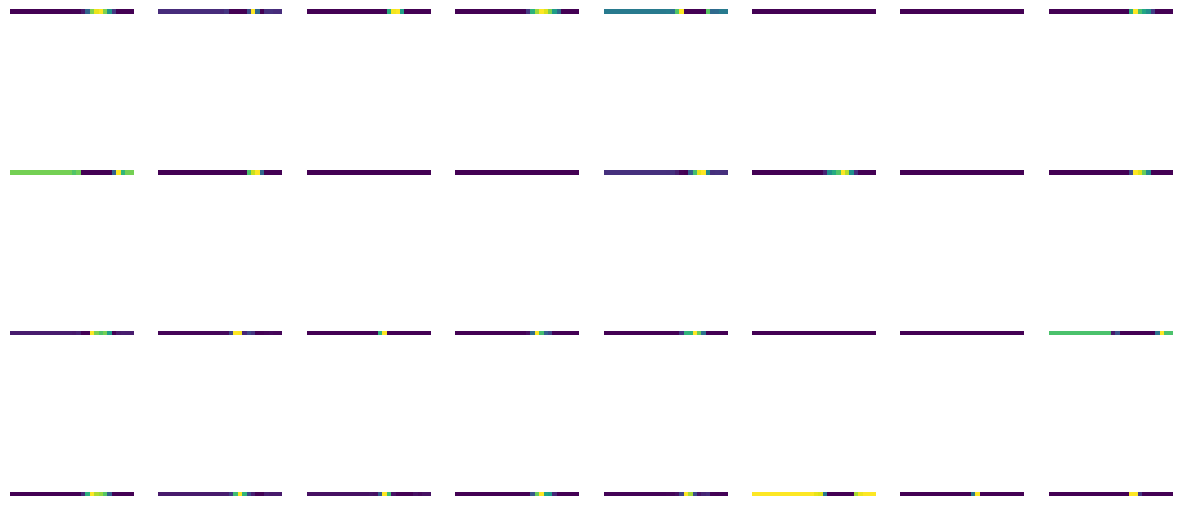

In [12]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')
model.layers

conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())
 
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')

no_trainning_model = keras.Sequential()
no_trainning_model.add(keras.layers.Conv2D(32, kernel_size =3, activation ='relu', padding ='same', input_shape =(28,28,1)))
no_trainning_conv = no_trainning_model.layers[0]
print(no_trainning_conv.weights[0].shape)

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

conv_acti = keras.Model(model.input, model.layers[0].output)        #함수형 API 를 통해 합성곱층 output을 출력하는 모델 생성
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[:,:,0,i*8 + j])
    axs[i, j].axis('off')
plt.show()
